In [212]:
# libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [213]:
# folders of imported files
folder_std = r'C:\Users\filip\Documents\EPFL\3_sem\ADA\project\P2\MovieSummaries'
folder_add = r'C:\Users\filip\Documents\EPFL\3_sem\ADA\project\P2\Added_df'

In [214]:
# import data. We will use the movie.metadata.tsv file
col_names = ['wikiID','freeID','movie_name','release_date','revenue','runtime','languages','countries','genres']
movies = pd.read_csv(folder_std + "\\movie.metadata.tsv",sep='\t',names=col_names)
movies.head()

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [215]:
# the column release date is set to be a datetime object. We have two different formats. we solve this using a mask
release_date = pd.to_datetime(movies['release_date'],errors='coerce')
mask = release_date.isna()
second_format = pd.to_datetime(movies['release_date'][mask],format='%Y',errors='coerce')
release_date[mask] = second_format
movies['release_date'] = release_date

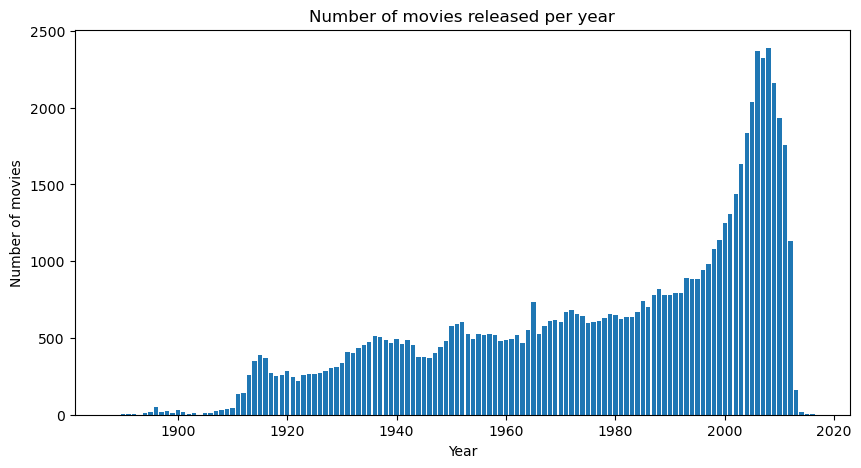

In [216]:
# we want to plot the number of movies released per year
# we group by year and count the number of movies
yearly_movies = movies.groupby(movies['release_date'].dt.year)['release_date'].count().reset_index(name='count')


# plot the number of movies per year
plt.figure(figsize=(10,5))
plt.bar(yearly_movies['release_date'],yearly_movies['count'])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released per year')
plt.show()

In [217]:
# we want to know how many movies were released before and after the year 2001, since this is the year of the twin towers attack
count_before2001 = yearly_movies[yearly_movies['release_date']<2001]['count'].sum()
count_after2001 = yearly_movies[yearly_movies['release_date']>=2001]['count'].sum()
print(f'Movies before the year 2001 are {count_before2001}')
print(f'Movies after the year 2001 are {count_after2001}')
print(f'The ratio of movies after the year 2001 is {count_after2001/(count_after2001+ count_before2001):.2}')  

Movies before the year 2001 are 49056
Movies after the year 2001 are 22488
The ratio of movies after the year 2001 is 0.31


The twin tower event has a relevant amount of films before (arounf 69%) and after (31%). This is a first sign that we can work analysing it through movies. 

Now, to really study arab actors, we read the actors df and work on the ethnicities.

In [218]:
# Read the character.metadata.tsv file
col_names = ['wikiID','freeID','release_date','character_name','birth','gender','height','ethnicity_code', 'actor_name', 'age_at_release', 'freeID_character_actor_map', 'freeID_character', 'freeID_actor']
characters= pd.read_csv(open(folder_std + "\\character.metadata.tsv",encoding='utf-8'), delimiter="\t", names=col_names)

characters.head()

,wikiID,freeID,release_date,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


We use a merge to join movies and character dataframes. We use the freeID and wikiID, (identifiers for movies) as keys

In [219]:
# merge the two dataframes on the wikiID and freeID
movies_characters = pd.merge(movies, characters, on=['freeID', 'wikiID'], how='inner', suffixes=('', '_y'))

# we drop the duplicate columns
movies_characters=movies_characters.drop(['release_date_y'], axis=1)
movies_characters.columns

# arab_people=movies_characters[movies_characters['etnicity']== 'arab'].groupby('movienames')

Index(['wikiID', 'freeID', 'movie_name', 'release_date', 'revenue', 'runtime',
       'languages', 'countries', 'genres', 'character_name', 'birth', 'gender',
       'height', 'ethnicity_code', 'actor_name', 'age_at_release',
       'freeID_character_actor_map', 'freeID_character', 'freeID_actor'],
      dtype='object')

In [220]:
movies_characters.head()

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


We want to study the ethnicity column. Analysing the freebase ID we want to get who is arab

In [221]:
# print the number of Actor ethnicities (Freebase ID)
eth_num = movies_characters['ethnicity_code'].unique().shape[0]
print(f'There are {eth_num} different ethnicities')


There are 480 different ethnicities


How to decode the Freebase ID to a prcise ethnicity? We used a query command to the freebase API and got a database to work on.

In [222]:
# read the csv file where we decode the ethnicities ID
ethnicity_decode = pd.read_csv(folder_add + "\\ethnicity.csv",sep=',')
ethnicity_decode.columns= ['ethnicity_code', 'ethnicity_name']
ethnicity_decode.head()

,ethnicity_code,ethnicity_name
0,/m/07s8n27,Makonde people
1,/m/02k1vf,Powhatan
2,/m/0630vt,Apalachee people
3,/m/038cy,Germanic peoples
4,/m/03gq7tt,Hän people


In [223]:
# merging the two dataframes
movies_characters_eth= pd.merge(movies_characters, ethnicity_decode, how='left', left_on=['ethnicity_code'], right_on=['ethnicity_code'])
movies_characters_eth.head()

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor,ethnicity_name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN


Did the ethnicity_decode work for all the freebase ID?


In [224]:
# filter the movies that have an eyhnicity_code but not the ethnicity_name
not_filtered= movies_characters_eth[ movies_characters_eth['ethnicity_code'].notna() * movies_characters_eth['ethnicity_name'].isna() ].copy()
print(f'characters not decoded: {not_filtered.shape[0]}')
print(f'portion of characters not decoded: {not_filtered.shape[0]/movies_characters_eth.shape[0]:.2}')

eth_not_decoded=not_filtered['ethnicity_code'].unique().shape[0]

eth_not_decoded_portion= eth_not_decoded/ movies_characters_eth['ethnicity_code'].unique().shape[0]
not_filtered['ethnicity_code'].unique().shape[0]

print(f'ethnicities not decoded {eth_not_decoded}')
print(f'portion of ethnicities not decoded {eth_not_decoded_portion:.2}')


characters not decoded: 50587
portion of characters not decoded: 0.11
ethnicities not decoded 158
portion of ethnicities not decoded 0.33


We wanna understand the portion of characters wiyh an ethnicity name and get an yearly plot

In [225]:
# fraction of characters that have not a ethnicity_name, per year
# we group by year and count the number of characters

yearly_characters= movies_characters_eth.groupby(movies_characters_eth['release_date'].dt.year)['release_date'].count().reset_index(name='charaters')
# characters with ethnicity

yearly_characters_w_eth_name= movies_characters_eth.groupby(movies_characters_eth['release_date'].dt.year)['ethnicity_name'].count().reset_index(name='charaters_weth_name')
yearly_characters_w_eth_code= movies_characters_eth.groupby(movies_characters_eth['release_date'].dt.year)['ethnicity_code'].count().reset_index(name='charaters_weth_code')

# merge the two dataframes
yearly_characters= pd.merge(yearly_characters, yearly_characters_w_eth_name, how='left', left_on=['release_date'], right_on=['release_date'])
yearly_characters= pd.merge(yearly_characters, yearly_characters_w_eth_code, how='left', left_on=['release_date'], right_on=['release_date'])
yearly_characters['charaters_weth_name_prop']= yearly_characters['charaters_weth_name']/yearly_characters['charaters']
yearly_characters.head()


,release_date,charaters,charaters_weth_name,charaters_weth_code,charaters_weth_name_prop
0,1888.0,4,0,0,0.00
1,1891.0,1,1,1,1.00
2,1893.0,2,0,0,0.00
3,1894.0,4,1,1,0.25
4,1895.0,1,0,0,0.00


Text(0, 0.5, 'Number of characters')

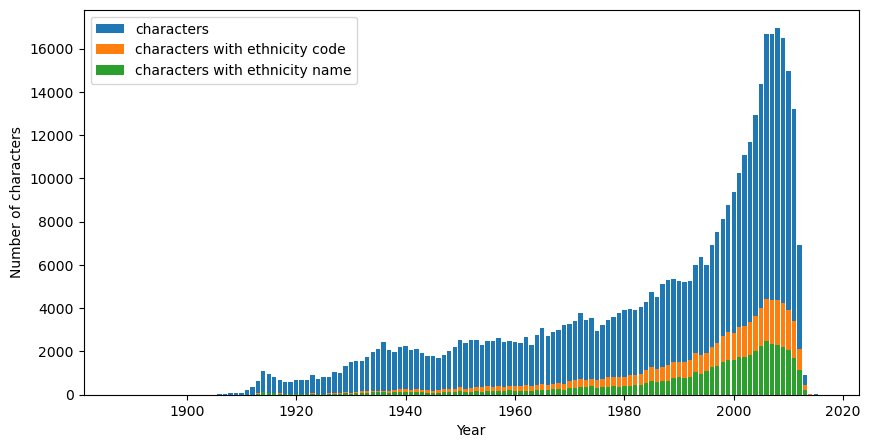

In [234]:
#plot 
plt.figure(figsize=(10,5))
plt.bar(yearly_characters['release_date'],yearly_characters['charaters'], label='characters')
plt.bar(yearly_characters['release_date'],yearly_characters['charaters_weth_code'], label='characters with ethnicity code')
plt.bar(yearly_characters['release_date'],yearly_characters['charaters_weth_name'], label='characters with ethnicity name')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of characters')

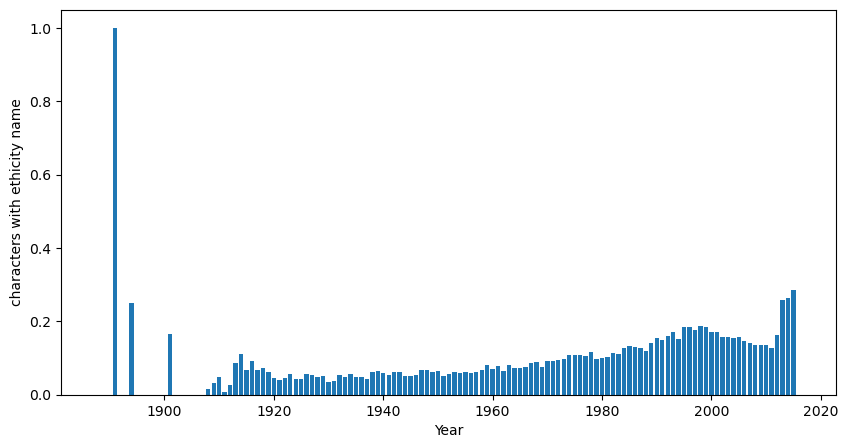

In [227]:
plt.figure(figsize=(10,5))
plt.bar(yearly_characters['release_date'],yearly_characters['charaters_weth_name_prop'])
plt.xlabel('Year')
plt.ylabel('characters with ethicity name')
plt.show()  

We can conclude that a small yearly proportion of characters has a ethnicity name. Now let's analyse arabs between these ethnicities

In [228]:
# count the frequency for ethnicity names
eth_count= movies_characters_eth.groupby(['ethnicity_name']).size().reset_index(name='count')
eth_count=eth_count.sort_values(by='count', ascending=False)

eth_count=eth_count.set_index(['ethnicity_name'])
eth_count.head(20)


,count
ethnicity_name,
African Americans,10159
English people,6165
Italian Americans,2956
White Americans,2250
Scottish American,2223
Irish people,1637
Tamil,1215
Punjabis,1155
Malayali,1146


In [229]:
# unique ethnicities
eth_unique=eth_count.index.unique()
print(eth_unique.shape[0])

# Commonly associated Muslim ethnicities. we used Chat GPT results
muslim_ethnicities = ['Punjabis', 'Malayali', 'Bengali people', 'Telugu people', 'Gujarati people', 'Pashtuns', 'Sri Lankan Tamils', 'Bihari people', 'Bengali Hindus', 'Kannada people', 'Kurdish', 'Tibetan people', 'Pakistani American', 'Muhajir']
arab_ethnicities = ['Punjabis', 'Bengali people', 'Gujarati people', 'Pashtuns', 'Sri Lankan Tamils', 'Bihari people', 'Sindhis', 'Kashmiri people', 'Afghans in India', 'Iranians', 'Albanian American', 'Syrian Americans', 'Moroccan Jews', 'Kurdish', 'Iraqi Americans', 'Turkish Americans', 'Lebanese Americans', 'Iranians in the United Kingdom', 'Palestinian American', 'Moroccan Americans', 'Egyptian Americans', 'Libyan Americans', 'Algerian Americans', 'Tunisian Americans', 'Yemeni Americans', 'Saudi Americans', 'Omani Americans', 'Emirati Americans', 'Qatari Americans', 'Kuwaiti Americans', 'Bahraini Americans', 'Jordanian Americans', 'Palestinians', 'Rohingya people', 'Malays', 'Indonesians', 'Bangladeshis', 'Pakistanis', 'Turks', 'Persians', 'Arabs']


# Filter ethnicities corresponding to Muslim people
muslim_ethnicities_subset = list(np.intersect1d(eth_unique, muslim_ethnicities))
arab_ethnicities_subset = list(np.intersect1d(eth_unique, arab_ethnicities))

# we got two subsets, one 
print(len(muslim_ethnicities_subset), muslim_ethnicities_subset)
print(len(arab_ethnicities_subset), arab_ethnicities_subset)

# Select only the ethnicity name of eth_unique in the arab_ethnicities_subset
arab_count=eth_count.loc[arab_ethnicities_subset].reset_index().copy()
arab_count=arab_count.sort_values(by='count', ascending=False)
arab_count.head(20)

320
13 ['Bengali Hindus', 'Bengali people', 'Bihari people', 'Gujarati people', 'Kannada people', 'Malayali', 'Muhajir', 'Pakistani American', 'Pashtuns', 'Punjabis', 'Sri Lankan Tamils', 'Telugu people', 'Tibetan people']
21 ['Afghans in India', 'Albanian American', 'Arabs', 'Bengali people', 'Bihari people', 'Gujarati people', 'Iranians', 'Iranians in the United Kingdom', 'Iraqi Americans', 'Kashmiri people', 'Lebanese Americans', 'Moroccan Americans', 'Moroccan Jews', 'Palestinian American', 'Pashtuns', 'Persians', 'Punjabis', 'Sindhis', 'Sri Lankan Tamils', 'Syrian Americans', 'Turkish Americans']


,ethnicity_name,count
16,Punjabis,1155
3,Bengali people,868
5,Gujarati people,463
17,Sindhis,314
14,Pashtuns,188
18,Sri Lankan Tamils,180
4,Bihari people,148
0,Afghans in India,130
1,Albanian American,121
10,Lebanese Americans,91


Now, we have a list of ethnicity names linked to the arab population. we want to understand the percestage respect to the total posupation and the yearly distribution

In [230]:
# proportion of arab characters
print(f'proportion of arab characters {arab_count["count"].sum()*100/eth_count["count"].sum():.3}%')

proportion of arab characters 7.24%


In [231]:
#filter only arab characters
movies_characters_eth_ar=movies_characters_eth[movies_characters_eth['ethnicity_name'].isin(arab_ethnicities_subset)]
movies_characters_eth_ar.head()

# count the number of arab characters per year
yearly_characters_ar= movies_characters_eth_ar.groupby(movies_characters_eth_ar['release_date'].dt.year)['release_date'].count().reset_index(name='charaters_ar')
yearly_characters= pd.merge(yearly_characters, yearly_characters_ar, how='left', left_on=['release_date'], right_on=['release_date'])
# substitute the nan values with 0
yearly_characters=yearly_characters.fillna(0)
# proportion of arab characters
yearly_characters['charaters_ar_prop']= yearly_characters['charaters_ar']/yearly_characters['charaters']
yearly_characters.head()

,release_date,charaters,charaters_weth_name,charaters_weth_code,charaters_weth_name_prop,charaters_ar,charaters_ar_prop
0,1888.0,4,0,0,0.00,0.0,0.0
1,1891.0,1,1,1,1.00,0.0,0.0
2,1893.0,2,0,0,0.00,0.0,0.0
3,1894.0,4,1,1,0.25,0.0,0.0
4,1895.0,1,0,0,0.00,0.0,0.0


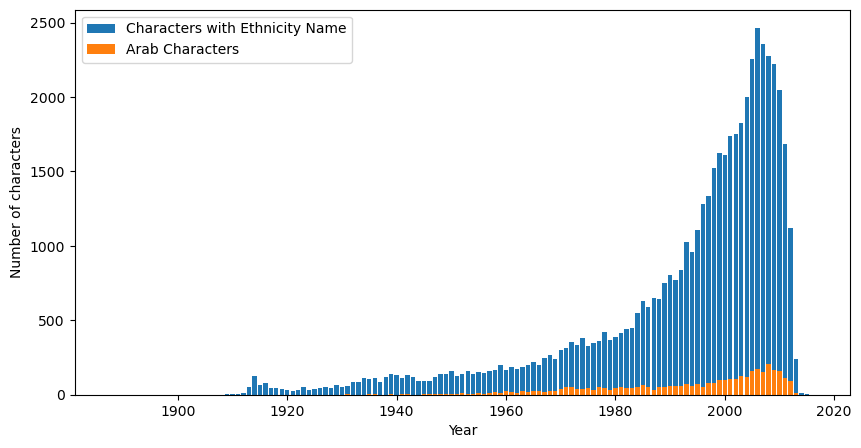

In [233]:
# plot the characters with an ethnicity and the characters with arab 
plt.figure(figsize=(10,5))
plt.bar(yearly_characters['release_date'],yearly_characters['charaters_weth_name'], label='Characters with Ethnicity Name')
plt.bar(yearly_characters['release_date'],yearly_characters['charaters_ar'], label='Arab Characters')
plt.xlabel('Year')
plt.ylabel('Number of characters')
plt.legend()
plt.show()

In [238]:
# arabs pre and post 2001
arab_post_2001=yearly_characters[yearly_characters['release_date']>2001]['charaters_ar'].sum()
arab_pre_2001=yearly_characters[yearly_characters['release_date']<=2001]['charaters_ar'].sum()
print(f'Arab characters before 2001: {arab_pre_2001}')
print(f'Arab characters after 2001: {arab_post_2001}')


Arab characters before 2001: 2145.0
Arab characters after 2001: 1586.0


In [84]:
'''
yearly_runtime=movies.groupby(movies['release_date'].dt.year)['runtime'].mean()

movies['runtime'].describe()
plt.figure(figsize=(10,5))
sns.boxplot(y=movies['runtime'], x=movies['release_date'].dt.year)
plt.yscale('log')
plt.ylim(10, 500)
plt.xticks(np.arange(0, len(yearly_movies), 10))
plt.ylabel('Runtime')
plt.title('Boxplot of runtime')
plt.show()

'''

"\nyearly_runtime=movies.groupby(movies['release_date'].dt.year)['runtime'].mean()\n\nmovies['runtime'].describe()\nplt.figure(figsize=(10,5))\nsns.boxplot(y=movies['runtime'], x=movies['release_date'].dt.year)\nplt.yscale('log')\nplt.ylim(10, 500)\nplt.xticks(np.arange(0, len(yearly_movies), 10))\nplt.ylabel('Runtime')\nplt.title('Boxplot of runtime')\nplt.show()\n\n"

In [85]:

'''
import pandas as pd
import json
types= pd.read_csv(folder + "\\tvtropes.clusters.txt", sep='\t', header=None, names=["type", "column_name"])


types['column_name']= types["column_name"].apply(lambda x: json.loads(x))


types_norm = pd.json_normalize(types['column_name'])


types_new= pd.concat([types, types_norm], axis=1)
types_new= types_new.drop(['column_name'], axis=1)
types_new.head()

typecast= types_new.groupby(['actor', 'type'])['movie'].count().reset_index(name='count')
typecast.head()
'''

'\nimport pandas as pd\nimport json\ntypes= pd.read_csv(folder + "\\tvtropes.clusters.txt", sep=\'\t\', header=None, names=["type", "column_name"])\n\n\ntypes[\'column_name\']= types["column_name"].apply(lambda x: json.loads(x))\n\n\ntypes_norm = pd.json_normalize(types[\'column_name\'])\n\n\ntypes_new= pd.concat([types, types_norm], axis=1)\ntypes_new= types_new.drop([\'column_name\'], axis=1)\ntypes_new.head()\n\ntypecast= types_new.groupby([\'actor\', \'type\'])[\'movie\'].count().reset_index(name=\'count\')\ntypecast.head()\n'

In [86]:

'''
print(typecast [typecast['count'] > 1].shape[0])
typecast [typecast['count'] > 1]
'''

"\nprint(typecast [typecast['count'] > 1].shape[0])\ntypecast [typecast['count'] > 1]\n"